### Замечания по установке

Я действовал по инструкции. У меня под Ubuntu установлена Anaconda.  Я запустил из командной строки:

```$ conda create --name MYFIPYENV --channel conda-forge python=3.6.4 fipy```

(*На Windows не установилось, выдавало непонятные ошибки*)

```$ conda activate MYFIPYENV```

После этого запустил jupyter notebook и попытался запустить код примера
[https://www.ctcms.nist.gov/fipy/examples/diffusion/generated/examples.diffusion.mesh20x20.html]

Выдало ошибку, связанную с версией numpy, я в командной строке в окружении MYFIPYENV запустил 
```$ conda install numpy=1.17```

После этого пример заработал.

In [1]:
from fipy import CellVariable, Grid2D, Viewer, TransientTerm, DiffusionTerm
from fipy.tools import numerix

In [2]:
nx = 20
ny = nx
dx = 1.
dy = dx
L = dx * nx
mesh = Grid2D(dx=dx, dy=dy, nx=nx, ny=ny)


In [3]:
phi = CellVariable(name = "solution variable",
                    mesh = mesh,
                    value = 0.)

In [5]:
D = 1.
eq = TransientTerm() == DiffusionTerm(coeff=D)

In [6]:
valueTopLeft = 0
valueBottomRight = 1

In [7]:
X, Y = mesh._faceCenters
facesTopLeft = ((mesh.facesLeft & (Y > L / 2)) | (mesh.facesTop & (X < L / 2)))
facesBottomRight = ((mesh.facesRight & (Y < L / 2)) | (mesh.facesBottom & (X > L / 2)))

In [8]:
phi.constrain(valueTopLeft, facesTopLeft)
phi.constrain(valueBottomRight, facesBottomRight)

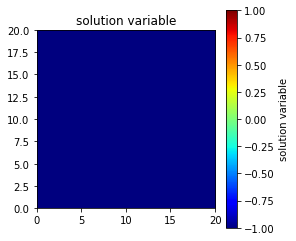

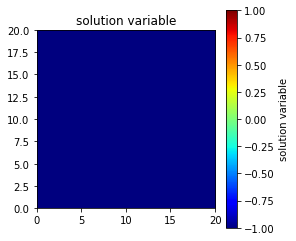

In [9]:
if __name__ == '__main__':
     viewer = Viewer(vars=phi, datamin=0., datamax=1.)
     viewer.plot()

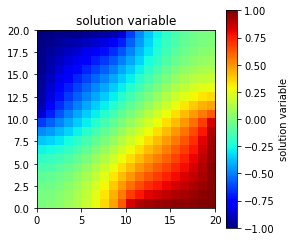

<Figure size 432x288 with 0 Axes>

In [10]:
timeStepDuration = 10 * 0.9 * dx**2 / (2 * D)
steps = 100
from builtins import range
for step in range(steps):
     eq.solve(var=phi,
              dt=timeStepDuration)
     if __name__ == '__main__':
         viewer.plot()

In [10]:
print(numerix.allclose(phi(((L,), (0,))), valueBottomRight, atol = 1e-2))

True


In [11]:
from fipy import input
if __name__ == '__main__':
     input("Implicit transient diffusion. Press <return> to proceed")

Implicit transient diffusion. Press <return> to proceed


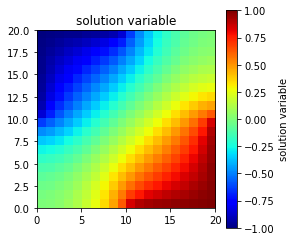

<Figure size 432x288 with 0 Axes>

In [12]:
DiffusionTerm().solve(var=phi)
if __name__ == '__main__':
     viewer.plot()

In [13]:
print(numerix.allclose(phi(((L,), (0,))), valueBottomRight, atol = 1e-2))

True


In [14]:
from fipy import input
if __name__ == '__main__':
     input("Implicit steady-state diffusion. Press <return> to proceed")

Implicit steady-state diffusion. Press <return> to proceed
